rules:

 - buy: current < seven day low AND current > 200 day moving average

 - sell: current > seven day high

In [213]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [214]:
df = pd.read_csv('readonly/lg_chemical_20110101_20201230_D.csv')
df = df[-500:].reset_index(drop=True)
df

,date,time,open,high,low,close,volume
0,20181220,0,351500,351500,338000,344000,253607
1,20181221,0,344000,361500,341500,358500,397305
2,20181224,0,357000,362500,355000,357500,104960
3,20181226,0,350000,356500,347500,353000,191680
4,20181227,0,359000,359500,345500,347000,172656
5,20181228,0,349000,352500,345500,347000,107893
6,20190102,0,351000,353500,335500,337000,227694
7,20190103,0,337500,341000,327500,328000,232935
8,20190104,0,327500,331500,321500,330500,146988
9,20190107,0,340000,350000,337500,343000,322157


In [215]:
data = pd.DataFrame()
data['close'] = df['close']
data['low7'] = df['low'].rolling(1).mean()
data['high7'] = df['high'].rolling(1).mean()
data['close200'] = df['close'].rolling(200).mean()

In [216]:
# - buy: current < seven day low AND current > 200 day moving average
# - sell: current > seven day high

def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data['close'][i] < data['low7'][i] and data['close'][i] > data['close200'][i]:
            if flag != 1:
                sigPriceBuy.append(data['close'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['close'][i] > data['high7'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['close'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)
    
data['Buy_Signal_Price'], data['Sell_Signal_Price']  = buy_sell(data)
data

,close,low7,high7,close200,Buy_Signal_Price,Sell_Signal_Price
0,344000,338000.0,351500.0,NaN,NaN,NaN
1,358500,341500.0,361500.0,NaN,NaN,NaN
2,357500,355000.0,362500.0,NaN,NaN,NaN
3,353000,347500.0,356500.0,NaN,NaN,NaN
4,347000,345500.0,359500.0,NaN,NaN,NaN
5,347000,345500.0,352500.0,NaN,NaN,NaN
6,337000,335500.0,353500.0,NaN,NaN,NaN
7,328000,327500.0,341000.0,NaN,NaN,NaN
8,330500,321500.0,331500.0,NaN,NaN,NaN
9,343000,337500.0,350000.0,NaN,NaN,NaN


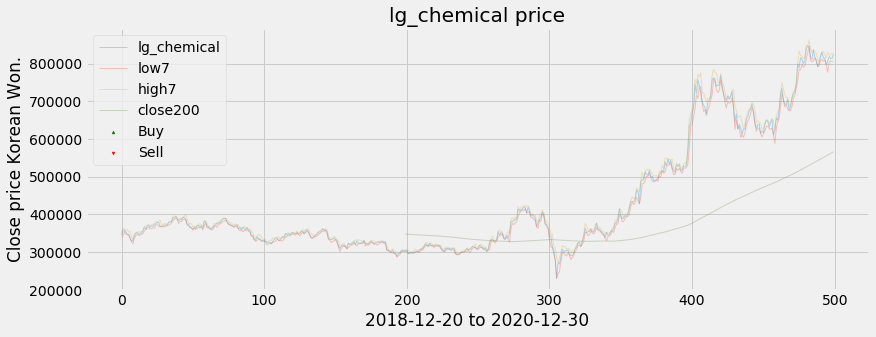

In [217]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(df['close'], label = 'lg_chemical', linewidth=1, alpha=0.3)
plt.plot(data['low7'], label = 'low7', linewidth=1, alpha=0.3)
plt.plot(data['high7'], label = 'high7', linewidth=1, alpha=0.3)
plt.plot(data['close200'], label = 'close200', linewidth=1, alpha=0.3)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker='^', color='green', s=8)
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker='v', color='red', s=8)
plt.title('lg_chemical price')
plt.xlabel('2018-12-20 to 2020-12-30')
plt.ylabel('Close price Korean Won.')
plt.legend(loc='upper left')
plt.show()

In [218]:
data_today = data.iloc[-1]
minute_data = pd.read_csv('readonly/lg_chemical_20201230_20201230_m1.csv')
minute_data = minute_data['close']
minute_data

0      811000
1      810000
2      810000
3      809000
4      810000
        ...  
376    824000
377    824000
378    824000
379    823000
380    824000
Name: close, Length: 381, dtype: int64

In [219]:
data_today

close                824000.0
low7                 805000.0
high7                824000.0
close200             565810.0
Buy_Signal_Price          NaN
Sell_Signal_Price         NaN
Name: 499, dtype: float64

In [220]:
def getSignal(current_price, data, flag):
    # return: 0 = no action, -1 = sell signal, 1 buy signal
    if flag == False and current_price < data['low7'] and current_price > data['close200']:
        flag = True
        return flag, 1
    elif flag == True and current_price > data['high7']:
        flag = False
        return flag, -1
    else:
        return flag, 0

In [221]:
isBought = False
for i in range(len(minute_data)):
    isBought, signal = getSignal(minute_data[i], data_today, isBought)
    print(isBought, signal)

False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0


In [222]:
data_today['low7']

805000.0

In [223]:
low = np.array(minute_data)
low.fill(data_today['low7'])

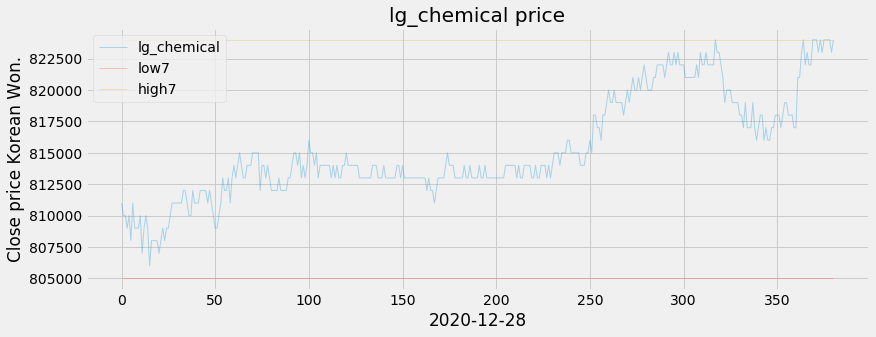

In [224]:
low = np.array(minute_data)
low.fill(data_today['low7'])
high = np.array(minute_data)
high.fill(data_today['high7'])
close200 = np.array(minute_data)
close200.fill(data_today['close200'])
plt.figure(figsize=(12.5, 4.5))
plt.plot(minute_data, label = 'lg_chemical', linewidth=1, alpha=0.3)
plt.plot(low, label = 'low7', linewidth=1, alpha=0.3)
plt.plot(high, label = 'high7', linewidth=1, alpha=0.3)
#plt.plot(close200, label = 'close200', linewidth=1, alpha=0.3)
#plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker='^', color='green', s=8)
#plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker='v', color='red', s=8)
plt.title('lg_chemical price')
plt.xlabel('2020-12-28')
plt.ylabel('Close price Korean Won.')
plt.legend(loc='upper left')
plt.show()